In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
labels = data.target_names

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
pipeline.fit(X_train, y_train)

print(f'Accuracy: {pipeline.score(X_test, y_test):.3f}')

Accuracy: 0.933


<Axes: >

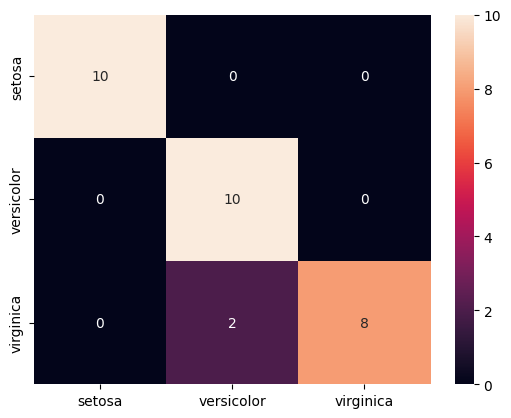

In [11]:
from sklearn.metrics import confusion_matrix

y_pred = pipeline.predict(X_test)
conf_matx = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matx, annot=True, xticklabels=labels, yticklabels=labels)

In [12]:
pipeline = Pipeline([ 
    ('scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('knn', KNeighborsClassifier()) 
])

In [13]:
param_grid = { 
    'pca__n_components': [2, 3, 4], 
    'knn__n_neighbors': [1, 3, 5, 7, 9] 
}

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

grid = GridSearchCV(pipeline, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    scoring='accuracy',
                    verbose=2,
                    n_jobs=-1)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=4; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=4; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_components=4; total time=   0.0s
[CV] END ............knn__n_neighbors=1, pca__n_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=2)

In [18]:
print(f'Accuracy: {grid.score(X_test, y_test):.3f}')
print(f'Best parameters: {grid.best_params_}')

Accuracy: 0.933
Best parameters: {'knn__n_neighbors': 3, 'pca__n_components': 3}
